<a href="https://colab.research.google.com/github/rxhith/Ai-Music-and-Lyrics/blob/main/Lyrics_(adele).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, GRU, Conv1D, Embedding, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import pdist, squareform
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rand
import numpy as np
import pronouncing
import markovify
import textstat
import math

In [8]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00


In [3]:
pip install pronouncing

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6234 sha256=7edf2a1fd901f9f8143e4512ad934aabe7125a8f8fdcf29006fed0d47f89f78e
  Stored in directory: /root/.cache/pip/wheels/05/f6/1d/599c67da1fa48c086d8c49e8fc6bd5f05bc9fa66fb04bed5db
Successfully built pronouncing


In [4]:
pip install markovify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18606 sha256=79803778270425ee2f4443bb7a0fb1dd076c4f69219432bed887e74b19a28e69
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [11]:
data = '/content/adele.txt'
(open(data, "r").read())

'Looking for some education\nMade my way into the night\nAll that bullshit conversation\nBaby, can\'t you read the signs? I won\'t bore you with the details, baby\nI don\'t even wanna waste your time\nLet\'s just say that maybe\nYou could help me ease my mind\nI ain\'t Mr. Right But if you\'re looking for fast love\nIf that\'s love in your eyes\nIt\'s more than enough\nHad some bad love\nSo fast love is all that I\'ve got on my mind Ooh, ooh\nOoh, ooh Looking for some affirmation\nMade my way into the sun\nMy friends got their ladies\nAnd they\'re all having babies\nI just wanna have some fun I won\'t bore you with the details, baby\nI don\'t even wanna waste your time\nLet\'s just say that maybe\nYou could help me ease my mind\nI ain\'t Mr. Right But if you\'re looking for fast love\nIf that\'s love in your eyes\nIt\'s more than enough\nI\'ve had some bad love\nSo fast love is all that I\'ve got on my mind Ooh, ooh\nBaby, baby\nOoh, ooh\nBaby, baby\nOoh, ooh\nBaby, baby\nOoh In the ab

In [12]:
artist_lyrics = []

with open(data, "r") as file:
  song = (file.read())
  artist_lyrics = song.replace('\ufeff', '').split("\n")

print(artist_lyrics)

['Looking for some education', 'Made my way into the night', 'All that bullshit conversation', "Baby, can't you read the signs? I won't bore you with the details, baby", "I don't even wanna waste your time", "Let's just say that maybe", 'You could help me ease my mind', "I ain't Mr. Right But if you're looking for fast love", "If that's love in your eyes", "It's more than enough", 'Had some bad love', "So fast love is all that I've got on my mind Ooh, ooh", 'Ooh, ooh Looking for some affirmation', 'Made my way into the sun', 'My friends got their ladies', "And they're all having babies", "I just wanna have some fun I won't bore you with the details, baby", "I don't even wanna waste your time", "Let's just say that maybe", 'You could help me ease my mind', "I ain't Mr. Right But if you're looking for fast love", "If that's love in your eyes", "It's more than enough", "I've had some bad love", "So fast love is all that I've got on my mind Ooh, ooh", 'Baby, baby', 'Ooh, ooh', 'Baby, baby'

In [15]:
markov_model = markovify.NewlineText(str("\n".join(artist_lyrics)), well_formed=False, state_size=3)

sentence = markov_model.make_sentence(tries=100)

print(sentence)

You've gotta stop holding me the way you walk that walk


In [16]:
# Test out the readability index
print(textstat.automated_readability_index(sentence))

3.3


In [17]:
# Train datasets
sequences = artist_lyrics

# Tokenize for TensorFlow
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sequences)

V = len(tokenizer.word_index)+1

# Padd the sequences
seq = pad_sequences(tokenizer.texts_to_sequences(sequences), maxlen=30)
seq

array([[  0,   0,   0, ...,  21, 219, 725],
       [  0,   0,   0, ..., 153,   3, 133],
       [  0,   0,   0, ...,  10, 726, 727],
       ...,
       [  0,   0,   0, ..., 198,   6, 208],
       [  0,   0,   0, ..., 198,   6, 208],
       [  0,   0,   0, ..., 198,   6, 208]], dtype=int32)

In [18]:
tokenizer.word_index.items()

dict_items([('i', 1), ('you', 2), ('the', 3), ('me', 4), ('to', 5), ('it', 6), ('and', 7), ('my', 8), ('your', 9), ('that', 10), ('love', 11), ('of', 12), ('in', 13), ('all', 14), ('we', 15), ('a', 16), ("i'm", 17), ('when', 18), ('but', 19), ('be', 20), ('for', 21), ('so', 22), ("don't", 23), ('never', 24), ("you're", 25), ('let', 26), ('if', 27), ('is', 28), ('know', 29), ('up', 30), ('go', 31), ('down', 32), ('will', 33), ('on', 34), ('just', 35), ('do', 36), ("ain't", 37), ('heart', 38), ('like', 39), ('with', 40), ('baby', 41), ("it's", 42), ('want', 43), ('this', 44), ("i've", 45), ('say', 46), ('no', 47), ('as', 48), ('had', 49), ('make', 50), ('can', 51), ('out', 52), ('ooh', 53), ('was', 54), ('one', 55), ("can't", 56), ('time', 57), ('what', 58), ('are', 59), ('feel', 60), ('see', 61), ("i'll", 62), ('fall', 63), ('there', 64), ('were', 65), ('gonna', 66), ('more', 67), ("won't", 68), ('oh', 69), ('back', 70), ('face', 71), ('have', 72), ('yeah', 73), ('at', 74), ("'cause", 7

In [19]:
seq.shape

(2400, 30)

In [20]:
V

1396

In [21]:
# Split to X/y data
train_X, train_y = seq[:, :-1], tf.keras.utils.to_categorical(seq[:, -1], num_classes=V)

print(train_X.shape, train_y.shape)

(2400, 29) (2400, 1396)


In [22]:
seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       254,  21, 219, 725], dtype=int32)

In [23]:
train_X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       254,  21, 219], dtype=int32)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 embedding (Embedding)       (None, 29, 512)           714752    
                                                                 
 dropout (Dropout)           (None, 29, 512)           0         
                                                                 
 bidirectional (Bidirection  (None, 29, 500)           1526000   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 500)               1502000   
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 500)               0     

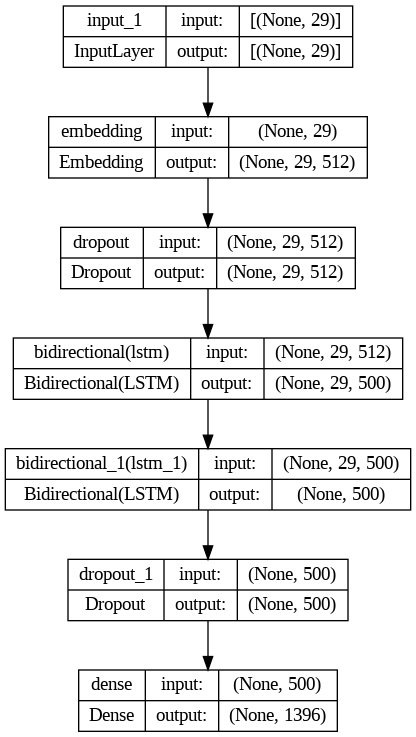

In [24]:
# LSTM
D = 512

T = train_X.shape[1]
i = Input(shape=(T,))
x = Embedding(V , D)(i)
x = Dropout(0.2)(x)
x = Bidirectional (LSTM(250,return_sequences=True))(x)
x = Bidirectional (LSTM(250))(x)
x = Dropout(0.2)(x)
x = Dense(V, activation="softmax")(x)
lstm_model = Model(i, x)

adam = tf.keras.optimizers.Adam(0.001)

lstm_model.compile(optimizer=adam, metrics=["accuracy"], loss="categorical_crossentropy")
lstm_model.summary()
tf.keras.utils.plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

es = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=20)
lstm_r = lstm_model.fit(train_X, train_y, epochs=1,callbacks=[learning_rate_reduction,es])

75/75 [==============================] - ETA: 0s - loss: 6.2675 - accuracy: 0.0479

75/75 [==============================] - 67s 811ms/step - loss: 6.2675 - accuracy: 0.0479 - lr: 0.0010


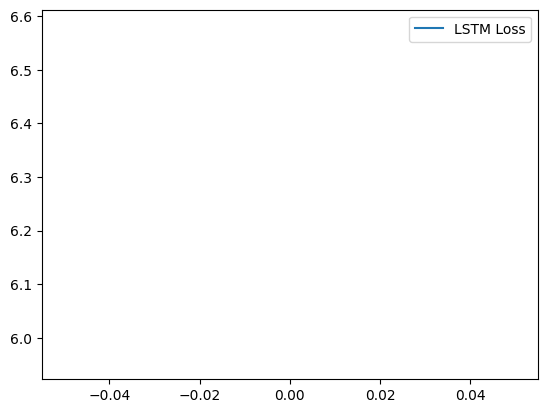

In [30]:
plt.plot(lstm_r.history['loss'], label="LSTM Loss")
plt.legend()

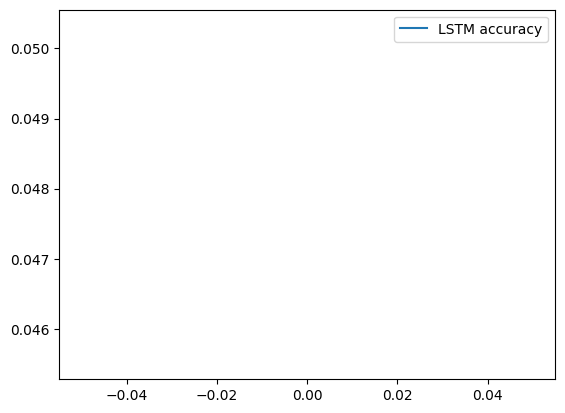

In [31]:
plt.plot(lstm_r.history['accuracy'], label="LSTM accuracy")
plt.legend()

In [32]:
def calc_readability(input_bars):
  avg_readability = 0
  for bar in input_bars:
    avg_readability += textstat.automated_readability_index(bar)
  return avg_readability / len(input_bars)

In [33]:
# check
calc_readability(["I say we've only known each other one year"])

0.9

In [34]:
def calc_rhyme_density(bars):
  total_syllables = 0
  rhymed_syllables = 0
  for bar in bars:
    for word in bar.split():
      p = pronouncing.phones_for_word(word)
      if len(p) == 0:
        break
      syllables = pronouncing.syllable_count(p[0])
      total_syllables += syllables
      has_rhyme = False
      for rhyme in pronouncing.rhymes(word):
        if has_rhyme:
          break
        for idx, r_bar in enumerate(bars):
          if idx > 4:
            break
          if rhyme in r_bar:
            rhymed_syllables += syllables
            has_rhyme = True
            break
  return rhymed_syllables/total_syllables

In [35]:
calc_rhyme_density(["I say we've only known each other one year"])

0.36363636363636365

In [36]:
def generate_bar(seed_phrase, model, length_of_bar):
  for i in range(length_of_bar):
    seed_tokens = pad_sequences(tokenizer.texts_to_sequences([seed_phrase]), maxlen=29)
    output_p = model.predict(seed_tokens)
    output_word = np.argmax(output_p, axis=1)[0]-1
    seed_phrase += " " + str(list(tokenizer.word_index.items())[output_word][0])
  return seed_phrase

In [37]:
def score_bar(input_bar, artists_bars, artists_avg_readability, artists_avg_rhyme_idx):
  gen_readability = textstat.automated_readability_index(input_bar)
  gen_rhyme_idx = calc_rhyme_density(input_bar)
  comp_bars = compare_bars(input_bar, artists_bars)

  # Scores based off readability, rhyme index, and originality. The lower the score the better.
  bar_score = (artists_avg_readability - gen_readability) + (artists_avg_rhyme_idx - gen_rhyme_idx) + comp_bars
  return bar_score

In [38]:
def compare_bars(input_bar, artists_bars):
  '''
    input_bars are the fire bars our AI generates
    artists_bars are the original bars for the artist

    The lower the score the better! We want unique bars
  '''
  # Converts sentences to matrix of token counts
  avg_dist = 0
  total_counted = 0
  for bar in artists_bars:
    v = CountVectorizer()
    # Vectorize the sentences
    word_vector = v.fit_transform([input_bar, bar])
    # Compute the cosine distance between the sentence vectors
    cos_dist = 1-pdist(word_vector.toarray(), 'cosine')[0]
    if not math.isnan(cos_dist):
      avg_dist += 1-pdist(word_vector.toarray(), 'cosine')[0]
      total_counted += 1
  return avg_dist/total_counted

In [39]:
def generate_song( model, artists_bars, length_of_bar=10, length_of_song=20, min_score_threshold=-0.2, max_score_threshold=0.2, tries=5):
  artists_avg_readability = calc_readability(artists_bars)
  artists_avg_rhyme_idx = calc_rhyme_density(artists_bars)
  fire_song = []
  cur_tries = 0
  candidate_bars = []

  while len(fire_song) < length_of_song:
    try:
        seed_sentence = markov_model.make_sentence(tries=100).split(" ")
        seed_sentence = " ".join(seed_sentence[:5])
    except:
        pass
    cur_tries += 1
    bar = generate_bar(seed_sentence, model, rand.randrange(5, length_of_bar))
    bar_score = score_bar(bar, artist_lyrics, artists_avg_readability, artists_avg_rhyme_idx)
    candidate_bars.append((bar_score, bar))


    if bar_score <= max_score_threshold and bar_score >= min_score_threshold:
      fire_song.append(bar)
      cur_tries = 0
      print("Generated Bar: ", len(fire_song))

    if cur_tries >= tries:
      lowest_score = np.Infinity
      best_bar = ""
      for bar in candidate_bars:
        if bar[0] < lowest_score:
          best_bar = bar[1]
          candidate_bars = []

      fire_song.append(best_bar)
      print("Generated Bar: ", len(fire_song))
      cur_tries = 0

  print("Generated song with avg rhyme density: ", calc_rhyme_density(fire_song), "and avg readability of: ", calc_readability(fire_song))
  return fire_song

In [40]:
# lstm model
lstm = generate_song( lstm_model, artist_lyrics, length_of_bar = 10, tries=100)

print("Song Generated with LSTM:")
for line in lstm:
  print(line)
print()

1/1 [==============================] - 0s 46ms/step
Generated Bar:  1
1/1 [==============================] - 0s 47ms/step
Generated Bar:  2
1/1 [==============================] - 0s 50ms/step
Generated Bar:  3
1/1 [==============================] - 0s 50ms/step
Generated Bar:  4
1/1 [==============================] - 0s 47ms/step
Generated Bar:  5
1/1 [==============================] - 0s 51ms/step
Generated Bar:  6
1/1 [==============================] - 0s 48ms/step
Generated Bar:  7
1/1 [==============================] - 0s 46ms/step
Generated Bar:  8
1/1 [==============================] - 0s 66ms/step
Generated Bar:  9
1/1 [==============================] - 0s 46ms/step
Generated Bar:  10
1/1 [==============================] - 0s 78ms/step
Generated Bar:  11
1/1 [==============================] - 0s 44ms/step
Generated Bar:  12
1/1 [==============================] - 0s 47ms/step
Generated Bar:  13
1/1 [==============================] - 0s 46ms/step
Generated Bar:  14
1/1 [==========

In [42]:
# Save LSTM model using native Keras format
lstm_model.save("lstm_model.keras")
